In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

## Objectives

The objective of this study is to predict the type of response from the other features of the complaint.

Null Hypothesis 1: Response type cannot be predicted from the Compliant

Alternative Hypothesis: Complaint variables can be used to predict the type of response.


In [6]:
df = pd.read_csv(r'C:\Users\Shweta\Documents\SQL Training\Google course\Springboard\Capstone Three\CFPB_six_months_data.csv')

In [7]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,112XX,None,Other,Web,03/12/23,Closed with non-monetary relief,Yes,NaN,6679469
1,02/02/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,None,"EQUIFAX, INC.",NY,13787,None,Consent not provided,Web,02/02/23,Closed with explanation,Yes,NaN,6531965
2,02/18/23,Credit card or prepaid card,Government benefit card,Trouble using the card,Trouble getting information about the card,The MoneyNetwork website and phone customer se...,None,FISERV INC.,WA,98223,Servicemember,Consent provided,Web,02/18/23,Closed with explanation,Yes,NaN,6588274
3,02/28/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"EQUIFAX, INC.",OH,44313,None,Other,Web,02/28/23,Closed with explanation,Yes,NaN,6621909
4,02/18/23,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Card opened as result of identity theft or fraud,XX/XX/XXXX : I got an email that I opened a XX...,None,CAPITAL ONE FINANCIAL CORPORATION,CA,90815,None,Consent provided,Web,02/18/23,Closed with non-monetary relief,Yes,NaN,6588699


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555528 entries, 0 to 555527
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date received                 555528 non-null  object 
 1   Product                       555528 non-null  object 
 2   Sub-product                   555528 non-null  object 
 3   Issue                         555528 non-null  object 
 4   Sub-issue                     555528 non-null  object 
 5   Consumer complaint narrative  162085 non-null  object 
 6   Company public response       555528 non-null  object 
 7   Company                       555528 non-null  object 
 8   State                         555528 non-null  object 
 9   ZIP code                      555528 non-null  object 
 10  Tags                          555528 non-null  object 
 11  Consumer consent provided?    538751 non-null  object 
 12  Submitted via                 555528 non-nul

The consumer disputed column does not have any entries. The columns that would aid in this study will be date received, Date sent to company, Company response to Consumer and Consumer complaint narrative. We need to convert the dates to datetime type.

## Checking for Missing values and Duplicates

In [9]:
# Checking for null values in each column
df.isnull().sum()

Date received                        0
Product                              0
Sub-product                          0
Issue                                0
Sub-issue                            0
Consumer complaint narrative    393443
Company public response              0
Company                              0
State                                0
ZIP code                             0
Tags                                 0
Consumer consent provided?       16777
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              555528
Complaint ID                         0
dtype: int64

In [10]:
df['Consumer disputed?'].nunique()

0

Clearly the column- Consumer Disputed has no significant relevance to our study and can be omitted.

In [67]:
df['Timely response?'].nunique()

2

It would good to analyse how many cases did the companies delay their responses.

In [68]:
# Analysing the value counts for column- Timely response?
df['Timely response?'].value_counts()

Yes    553098
No       2430
Name: Timely response?, dtype: int64

In [11]:
# Analysing the value counts for column- Consumer consent provided?
df['Consumer consent provided?'].value_counts()

Consent not provided    207958
Consent provided        162127
None                    137634
Other                    29791
Consent withdrawn         1241
Name: Consumer consent provided?, dtype: int64

In [12]:
df[df['Consumer consent provided?'].isnull()]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
28,02/15/23,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,None,"CITIZENS FINANCIAL GROUP, INC.",DE,19809,Older American,NaN,Phone,02/15/23,Closed with explanation,Yes,NaN,6577275
70,01/19/23,Mortgage,Conventional home mortgage,Trouble during payment process,None,NaN,Company has responded to the consumer and the ...,NEW YORK COMMUNITY BANCORP INC,SC,29909,None,NaN,Referral,01/19/23,Closed with explanation,Yes,NaN,6459339
130,02/15/23,Vehicle loan or lease,Loan,Managing the loan or lease,Billing problem,NaN,None,ALASKA USA FEDERAL CREDIT UNION,OR,97219,None,NaN,Referral,03/15/23,Closed with explanation,Yes,NaN,6582329
131,04/06/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MI,48197,None,NaN,Phone,04/06/23,Closed with non-monetary relief,Yes,NaN,6804229
139,01/17/23,Vehicle loan or lease,Loan,Struggling to pay your loan,Loan balance remaining after the vehicle is re...,NaN,None,"SANTANDER HOLDINGS USA, INC.",CA,94568,None,NaN,Phone,02/13/23,Closed with explanation,Yes,NaN,6448247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555380,12/01/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"EQUIFAX, INC.",OK,73084,None,NaN,Phone,12/01/22,Closed with explanation,Yes,NaN,6264208
555388,12/13/22,Checking or savings account,Checking account,Opening an account,Confusing or missing disclosures,NaN,None,PNC Bank N.A.,TX,78108,Servicemember,NaN,Phone,12/13/22,Closed with monetary relief,Yes,NaN,6316334
555414,11/29/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,None,"EQUIFAX, INC.",GA,30316,None,NaN,Phone,11/29/22,Closed with explanation,Yes,NaN,6258716
555517,02/06/23,Mortgage,Conventional home mortgage,Trouble during payment process,None,NaN,None,"LD Holdings Group, LLC",DC,20019,None,NaN,Phone,02/06/23,Closed with explanation,Yes,NaN,6536041


Consent refers to the consent of the consumer to share their narrative. In all the cases where consumer consent is NaN, it looks like customer narraitive is also missing.

In [13]:
df[df['Consumer consent provided?'].isnull() & df['Consumer complaint narrative'].isnull()]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
28,02/15/23,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,None,"CITIZENS FINANCIAL GROUP, INC.",DE,19809,Older American,NaN,Phone,02/15/23,Closed with explanation,Yes,NaN,6577275
70,01/19/23,Mortgage,Conventional home mortgage,Trouble during payment process,None,NaN,Company has responded to the consumer and the ...,NEW YORK COMMUNITY BANCORP INC,SC,29909,None,NaN,Referral,01/19/23,Closed with explanation,Yes,NaN,6459339
130,02/15/23,Vehicle loan or lease,Loan,Managing the loan or lease,Billing problem,NaN,None,ALASKA USA FEDERAL CREDIT UNION,OR,97219,None,NaN,Referral,03/15/23,Closed with explanation,Yes,NaN,6582329
131,04/06/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MI,48197,None,NaN,Phone,04/06/23,Closed with non-monetary relief,Yes,NaN,6804229
139,01/17/23,Vehicle loan or lease,Loan,Struggling to pay your loan,Loan balance remaining after the vehicle is re...,NaN,None,"SANTANDER HOLDINGS USA, INC.",CA,94568,None,NaN,Phone,02/13/23,Closed with explanation,Yes,NaN,6448247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555380,12/01/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"EQUIFAX, INC.",OK,73084,None,NaN,Phone,12/01/22,Closed with explanation,Yes,NaN,6264208
555388,12/13/22,Checking or savings account,Checking account,Opening an account,Confusing or missing disclosures,NaN,None,PNC Bank N.A.,TX,78108,Servicemember,NaN,Phone,12/13/22,Closed with monetary relief,Yes,NaN,6316334
555414,11/29/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,None,"EQUIFAX, INC.",GA,30316,None,NaN,Phone,11/29/22,Closed with explanation,Yes,NaN,6258716
555517,02/06/23,Mortgage,Conventional home mortgage,Trouble during payment process,None,NaN,None,"LD Holdings Group, LLC",DC,20019,None,NaN,Phone,02/06/23,Closed with explanation,Yes,NaN,6536041


This confirms our suspicion. However we will not delete this rows as of now, because they will be required to calculate response time. They however will not serve any purpose in sentiment and text analysis.

In [14]:
df['Tags'].value_counts()

None                             510802
Servicemember                     31426
Older American                    10178
Older American, Servicemember      3122
Name: Tags, dtype: int64

These tags give an idea of the population demographics to some extent and can be used later. It is to be noted that these tags are added by customers and hence may not be accurate.

Since the dataset is comprised of categorical values, there is no need to check for outliers.

In [15]:
#Checking duplicates
bool_series = df.duplicated()

In [16]:
print(sum(bool_series))

0


## Exploring the Dataset

Lets analyse all the columns of the dataset. This may help us find some patterns. We start with the product type.

### 1. Product Analysis

Text(0, 0.5, 'Total complaints in last 6 months')

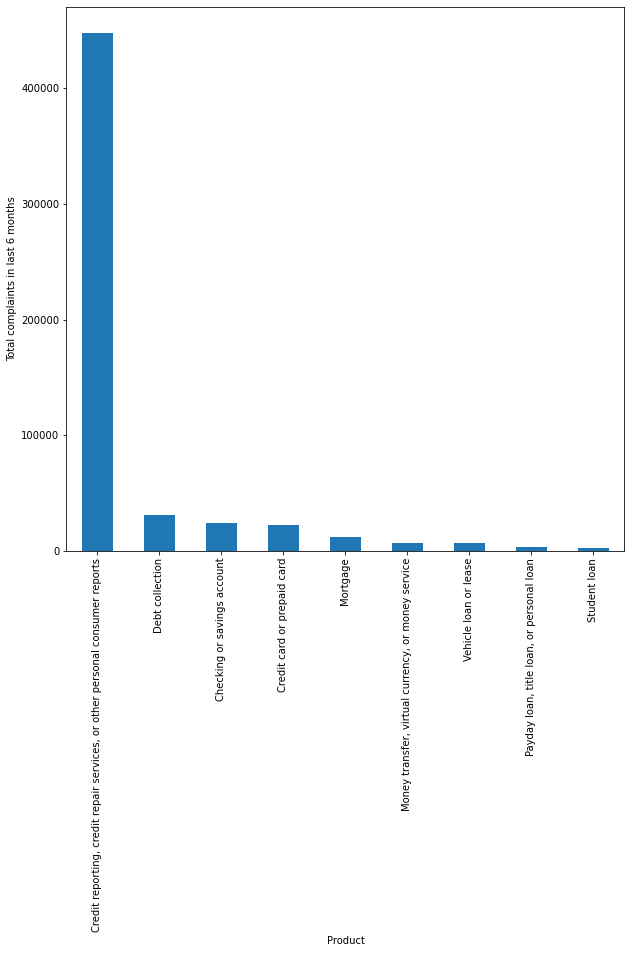

In [17]:
df['Product'].value_counts().plot(kind='bar', figsize=(10,10))
plt.xlabel("Product")
plt.ylabel("Total complaints in last 6 months")

Most compliants fall under the Product category of Credit services or Credit reporting. However it is to be noted that these product categories are chosen by consumers.

In [18]:
# other than product, we also notice subproduct column
df['Sub-product'].value_counts()

Credit reporting                              444897
Checking account                               19603
General-purpose credit card or charge card     18107
Other debt                                      9230
I do not know                                   8018
Conventional home mortgage                      6840
Credit card debt                                6568
Loan                                            5596
Medical debt                                    4165
Store credit card                               2657
FHA mortgage                                    2332
Mobile or digital wallet                        2313
Other personal consumer report                  2079
Federal student loan servicing                  2068
Savings account                                 2050
Domestic (US) money transfer                    1765
Other banking product or service                1750
Installment loan                                1454
Auto debt                                     

Almost 17k customers are not sure if they have chosen the right category and hence the selection of 'Other debt' and 'I do not know', indicating that most customers may not have placed the complaints in the right category.

In [19]:
# Lets check the number of unique companies that have compliants.
df['Company'].nunique()

2558

That is a huge number and for now we are not looking at going deeper here.

### 2. State Analysis

It would be interesting to know the number of compliants State wise. Could there be any patterns of calls with respect to different states?

Text(0, 0.5, 'Total complaints in last 6 months')

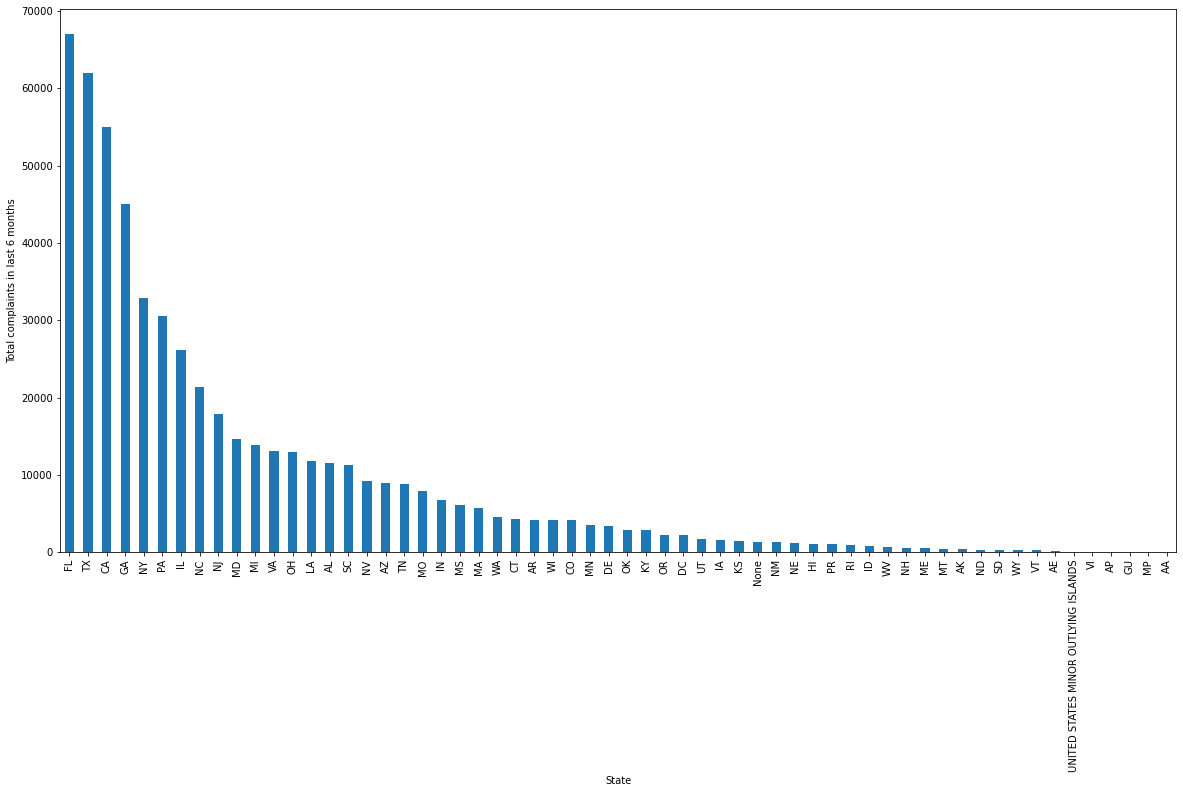

In [20]:
df['State'].value_counts().plot(kind='bar', figsize=(20,10))
plt.xlabel("State")
plt.ylabel("Total complaints in last 6 months")

Some states show considerably higher number of complaints. Could it just be population? Let us subset it to analyse it further with the top 5 states


In [21]:
df_state=df['State'].value_counts()
df_state= df_state.reset_index()# this is to give it new column names so that the resulting output is a dataframe & not series
df_state.columns = ['State', 'Total_Complaints'] # assign new column names
df_state.head(5)

,State,Total_Complaints
0,FL,66983
1,TX,62061
2,CA,55050
3,GA,45025
4,NY,32941


In [22]:
df_state.shape

(60, 2)

We read a new csv which contains population data for every state

In [23]:
#read csv containing populn data for 2022 downloaded from Statista.
popu_state = pd.read_csv(r'C:\Users\Shweta\Documents\SQL Training\Google course\Springboard\Capstone Three\State_population_data.csv')

In [24]:
popu_state.shape

(51, 2)

In [25]:
#Since this is a sorted Database, we can check the top 5 rows.
popu_state.head(5)

,State,Population _in _millions
0,CA,39.03
1,TX,30.03
2,FL,22.24
3,NY,19.68
4,PA,12.97


The top five states in population also appear in the list with the highest number of calls indicating that population of a state directly affects the number of calls from the state.

### 3. Consumer Consent Analysis

CFPB takes the consent of a consumer to share record. Lets see how this column is affecting the dataset. 

Text(0, 0.5, 'Total complaints in last 6 months')

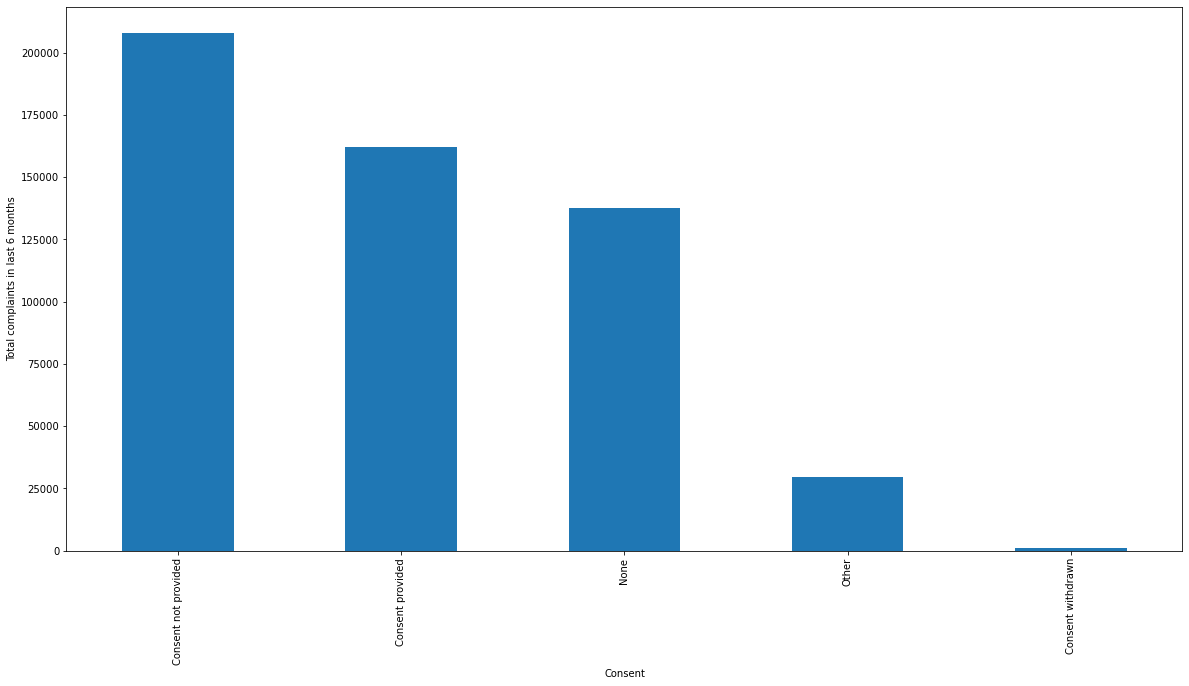

In [26]:
df['Consumer consent provided?'].value_counts().plot(kind='bar', figsize=(20,10))
plt.xlabel("Consent")
plt.ylabel("Total complaints in last 6 months")

Most number of consumers have not provided consent, which means there could be data that is missing from the dataset. Let's check that further.

In [29]:
# We analyse the rows with no consent from consumer by creating a subset.
df_no_consent = df[df['Consumer consent provided?']== 'Consent not provided']

In [30]:
df_no_consent.head(50)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1,02/02/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,None,"EQUIFAX, INC.",NY,13787,None,Consent not provided,Web,02/02/23,Closed with explanation,Yes,NaN,6531965
10,02/03/23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,None,"EQUIFAX, INC.",TN,38125,None,Consent not provided,Web,02/03/23,Closed with explanation,Yes,NaN,6528085
11,03/12/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,GA,30344,None,Consent not provided,Web,03/12/23,Closed with explanation,Yes,NaN,6684296
12,04/05/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60120,None,Consent not provided,Web,04/05/23,Closed with non-monetary relief,Yes,NaN,6797651
15,03/21/23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with fraud alerts or security freezes,None,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,36426,None,Consent not provided,Web,03/21/23,Closed with non-monetary relief,Yes,NaN,6724042
17,02/17/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,None,"EQUIFAX, INC.",TN,37174,Older American,Consent not provided,Web,02/17/23,Closed with explanation,Yes,NaN,6578969
19,02/27/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"EQUIFAX, INC.",MO,65203,None,Consent not provided,Web,02/27/23,Closed with explanation,Yes,NaN,6626451
20,02/17/23,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,None,CL Holdings LLC,LA,70815,None,Consent not provided,Web,03/14/23,Closed with explanation,Yes,NaN,6579174
21,02/16/23,Credit card or prepaid card,General-purpose credit card or charge card,Trouble using your card,Credit card company won't increase or decrease...,NaN,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,PA,17112,None,Consent not provided,Web,02/16/23,Closed with explanation,Yes,NaN,6581536
23,03/13/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,None,"EQUIFAX, INC.",FL,32208,None,Consent not provided,Web,03/13/23,Closed with explanation,Yes,NaN,6690152


In [31]:
df_no_consent[df_no_consent.notnull()].count()

Date received                   207958
Product                         207958
Sub-product                     207958
Issue                           207958
Sub-issue                       207958
Consumer complaint narrative         0
Company public response         207958
Company                         207958
State                           207958
ZIP code                        207958
Tags                            207958
Consumer consent provided?      207958
Submitted via                   207958
Date sent to company            207958
Company response to consumer    207958
Timely response?                207958
Consumer disputed?                   0
Complaint ID                    207958
dtype: int64

When the consent of consumer is not provided, Complaint narrative has not been shared.This means when we are working on the second hypothesis to conduct sentiment analysis, we will have access to only those narratives which have been approved by the consumer.

### 4. Company Response Analysis

We first find the percentage of each category of response.

In [32]:
#Creating a subset with the percentage values
df_percent= df['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent# this is a series

Closed with explanation            49.6
Closed with non-monetary relief    26.4
In progress                        22.4
Closed with monetary relief         1.5
Untimely response                   0.1
Name: Company response to consumer, dtype: float64

In [33]:
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of total complaints'})# renaming columns
df_percent# new dataframe

,Percentage of total complaints
Closed with explanation,49.6
Closed with non-monetary relief,26.4
In progress,22.4
Closed with monetary relief,1.5
Untimely response,0.1


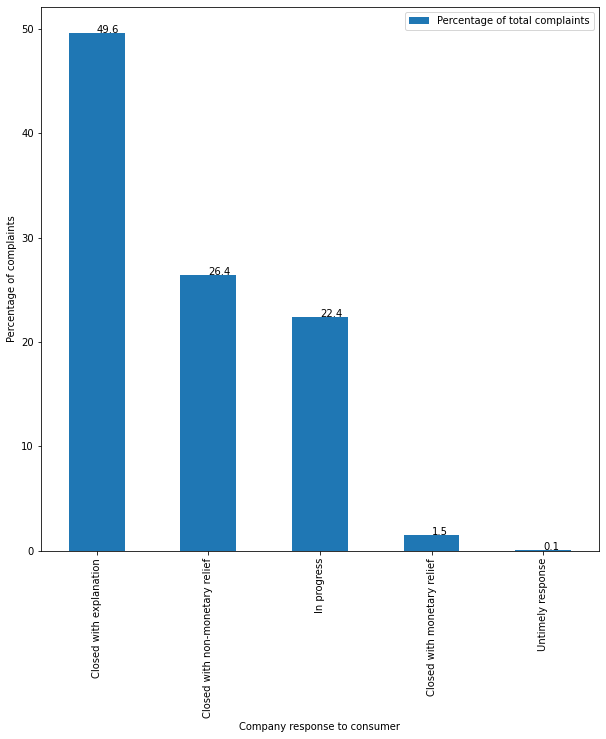

In [34]:
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer")
plt.ylabel("Percentage of complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of total complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)



We see that monetary relief is an extremely small share of the total responses by Companies. Most companies respond with explanation. What kind of responses receive non-monetary relief? and which products are mostly closed with monetary relief? Let us analyse these in details

In [35]:
# Creating a subset with just the required columns to analyse further
df_response = df[['Company response to consumer', 'Product', 'Company', 'Timely response?']]

Text(0.5, 0, 'Total number of complaints')

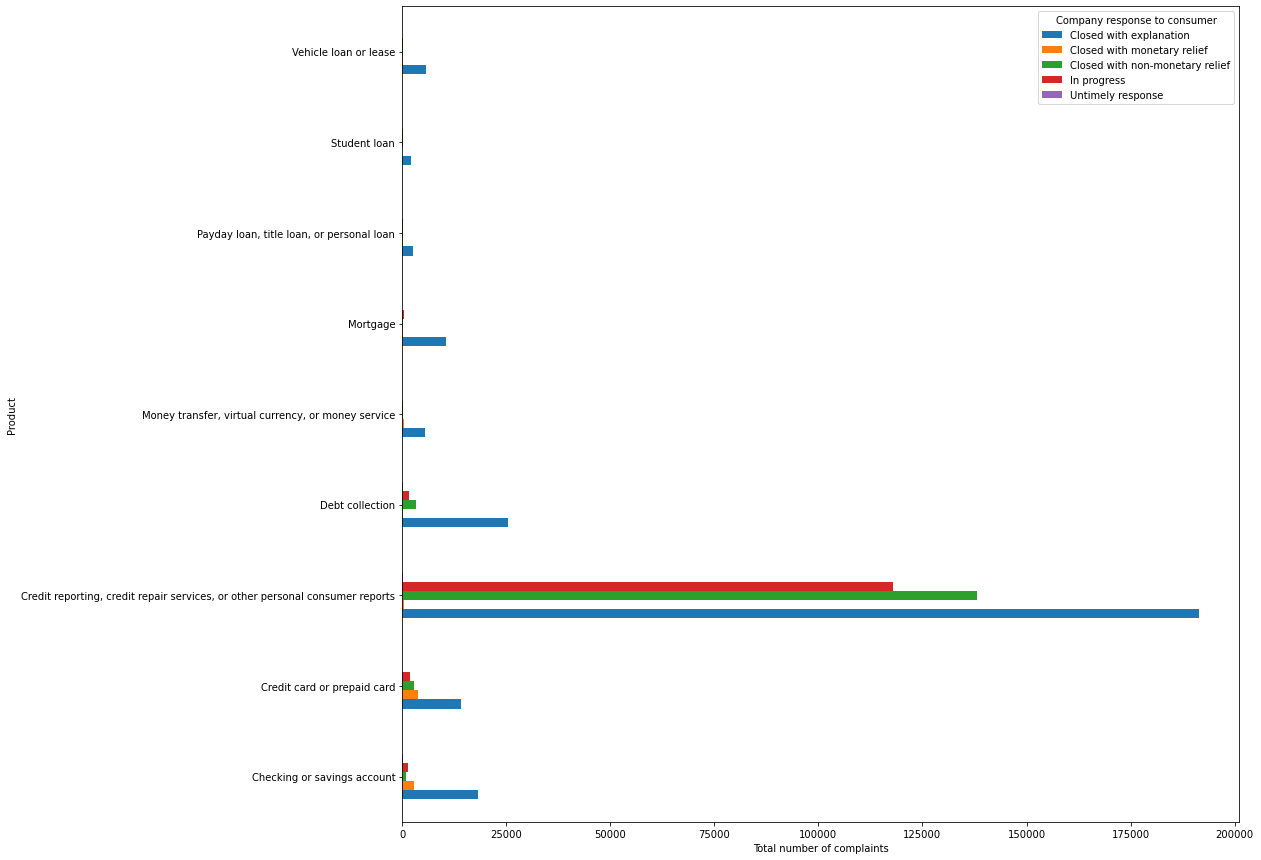

In [36]:
df_response.pivot_table(index='Product', columns='Company response to consumer', aggfunc='size').plot.barh(figsize=(15,15))
plt.xlabel("Total number of complaints")

We see considerable cases of closure with monetary relief in Credit Card/ Prepaid card and Checking/ Savings account based complaints. We can proceed further by analyzing each of the product lines separately.

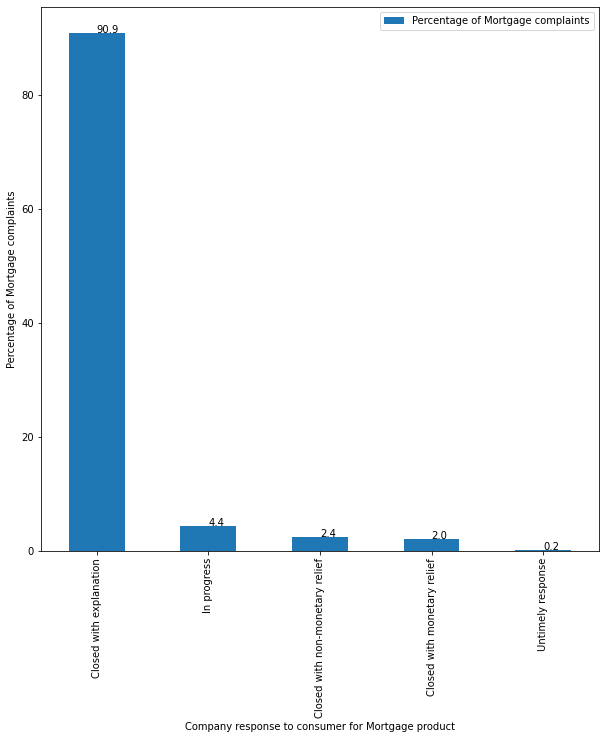

In [37]:
# Creating subset for Product-Mortgage
df_mortgage=df_response[df_response['Product']== 'Mortgage']
#Creating a subset with the percentage values
df_percent = df_mortgage['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of Mortgage complaints'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer for Mortgage product")
plt.ylabel("Percentage of Mortgage complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of Mortgage complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)

With Mortgage product line, we see that most complaints have been addressed with explanation. Monetary relief payments are higher overall and Non-monetary and In progress cases are smaller in Mortgage category.

([<matplotlib.patches.Wedge at 0x1e4035f4040>,
 [Text(-0.4085734157734743, 1.0213068901770888, 'Closed with explanation'),
  Text(-0.32156099046608405, -1.0519498701984193, 'Closed with monetary relief'),
  Text(0.6398948390319837, -0.8947259887698757, 'Closed with non-monetary relief'),
  Text(1.058347603150014, -0.29983387218028035, 'In progress'),
  Text(1.0999939092135451, -0.003660559124407928, 'Untimely response')],
 [Text(-0.2228582267855314, 0.5570764855511392, '62.1%\n'),
  Text(-0.1753969038905913, -0.5737908382900468, '16.3%\n'),
  Text(0.3490335485629002, -0.4880323575108413, '12.9%\n'),
  Text(0.5772805108090985, -0.16354574846197106, '8.6%\n'),
  Text(0.5999966777528427, -0.001996668613313415, '0.1%\n')])

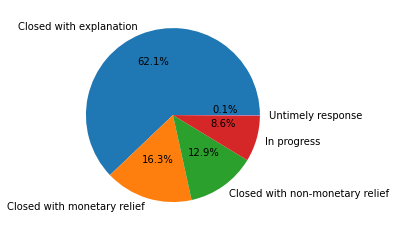

In [38]:
df_card=df_response[df_response['Product']== 'Credit card or prepaid card']
total_response = df_card['Company response to consumer'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n'.format(x, total_response*x/100)

plt.pie(df_card['Company response to consumer'].value_counts().values, labels=df_card['Company response to consumer'].value_counts().index, autopct=fmt)
#plt.legend(loc="lower right")
#plt.legend(labels, loc='left center', bbox_to_anchor=(-0.1, 1.), fontsize=8)

Clearly the monetary relief and non-monetary relief responses occupy a larger piece of the pie than the previous product category. So we see less cases of closed with explanation in Card complaints.It also is the highest when it comes to monetary relief cases.

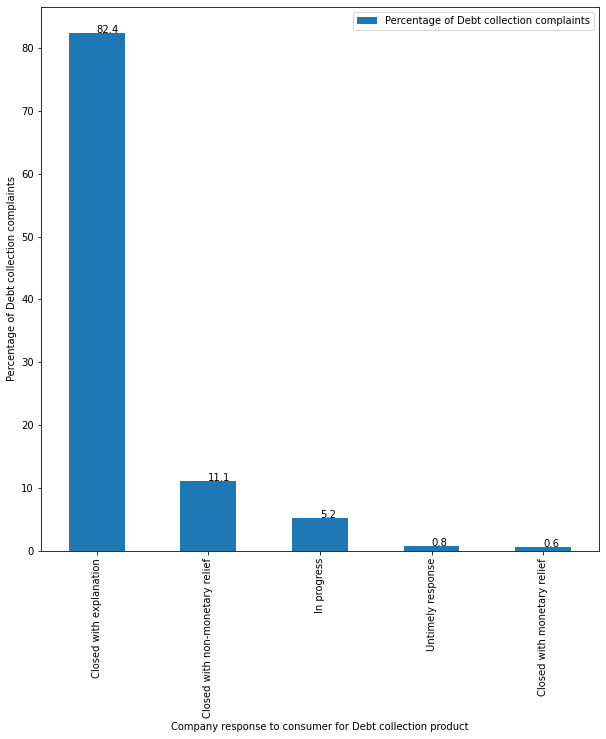

In [39]:
# Creating subset for Product-debt collection
df_debt=df_response[df_response['Product']== 'Debt collection']
#Creating a subset with the percentage values
df_percent = df_debt['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of Debt collection complaints'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer for Debt collection product")
plt.ylabel("Percentage of Debt collection complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of Debt collection complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)





Higher number of cases/complaints in debt category were closed with explanation and non-monetary relief was just 11% and tghe rest were less than that.

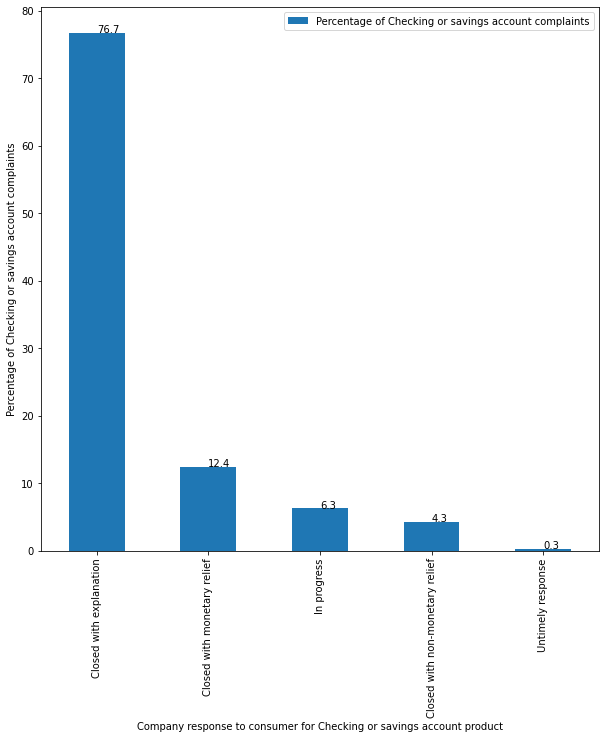

In [40]:

# Creating subset for Product- Checking or savings account
df_account=df_response[df_response['Product']== 'Checking or savings account']
#Creating a subset with the percentage values
df_percent = df_account['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of Checking or savings account complaints'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer for Checking or savings account product")
plt.ylabel("Percentage of Checking or savings account complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of Checking or savings account complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)


This product- checking and savings account have the second highest complaint closures with monetary relief.

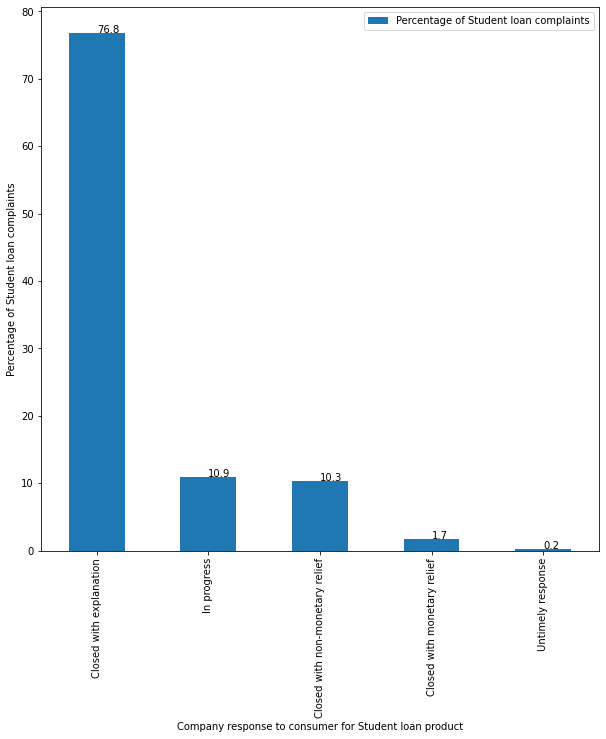

In [41]:

# Creating subset for Product-student loan
df_student=df_response[df_response['Product']== 'Student loan']
#Creating a subset with the percentage values
df_percent = df_student['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of Student loan complaints'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer for Student loan product")
plt.ylabel("Percentage of Student loan complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of Student loan complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)



Other than explanation and non- monetary relief, the 'In progress' category is substantially higher than the same in other product categories.

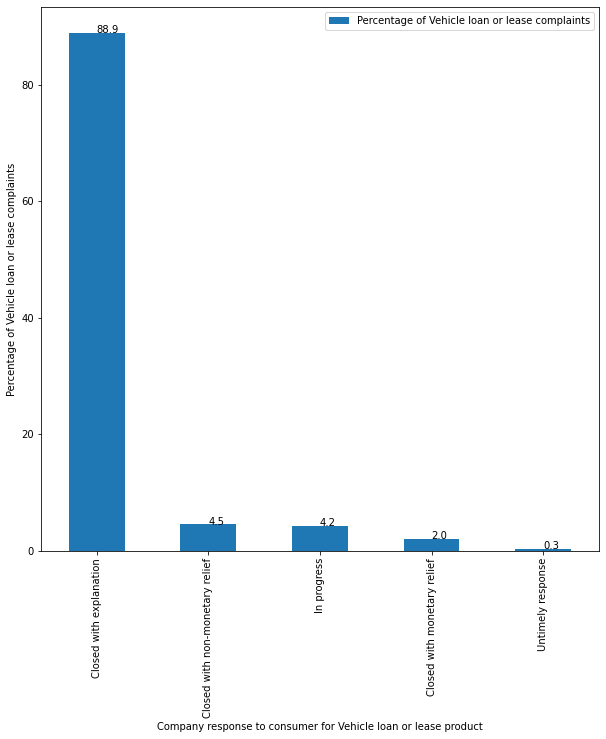

In [42]:
# Creating subset for Product-Vehicle loan or lease
df_vehicle=df_response[df_response['Product']== 'Vehicle loan or lease']
#Creating a subset with the percentage values
df_percent = df_vehicle['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of Vehicle loan or lease complaints'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer for Vehicle loan or lease product")
plt.ylabel("Percentage of Vehicle loan or lease complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of Vehicle loan or lease complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)



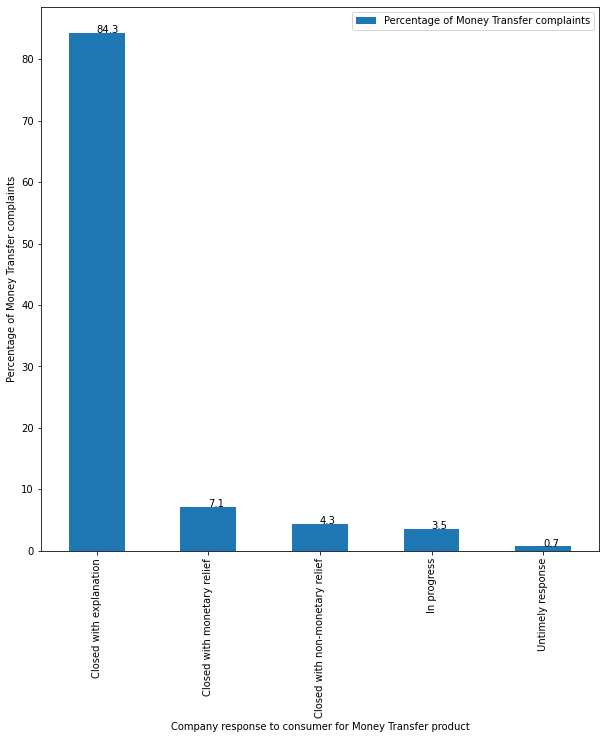

In [43]:
# Creating subset for Product-Money transfer, virtual currency, or money service
df_transfer=df_response[df_response['Product']== 'Money transfer, virtual currency, or money service']
#Creating a subset with the percentage values
df_percent = df_transfer['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of Money Transfer complaints'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer for Money Transfer product")
plt.ylabel("Percentage of Money Transfer complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of Money Transfer complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)


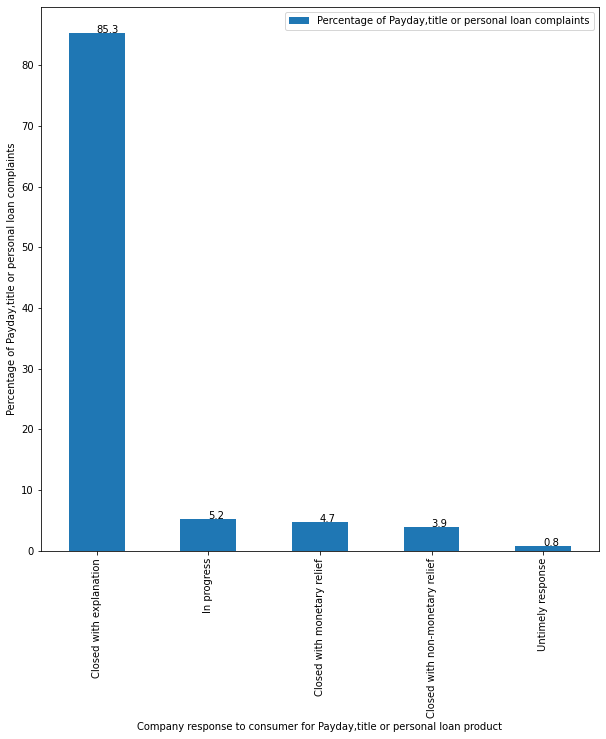

In [44]:
# Creating subset for Product-Payday loan, title loan, or personal loan
df_loan=df_response[df_response['Product']== 'Payday loan, title loan, or personal loan']
#Creating a subset with the percentage values
df_percent = df_loan['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of Payday,title or personal loan complaints'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer for Payday,title or personal loan product")
plt.ylabel("Percentage of Payday,title or personal loan complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of Payday,title or personal loan complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)


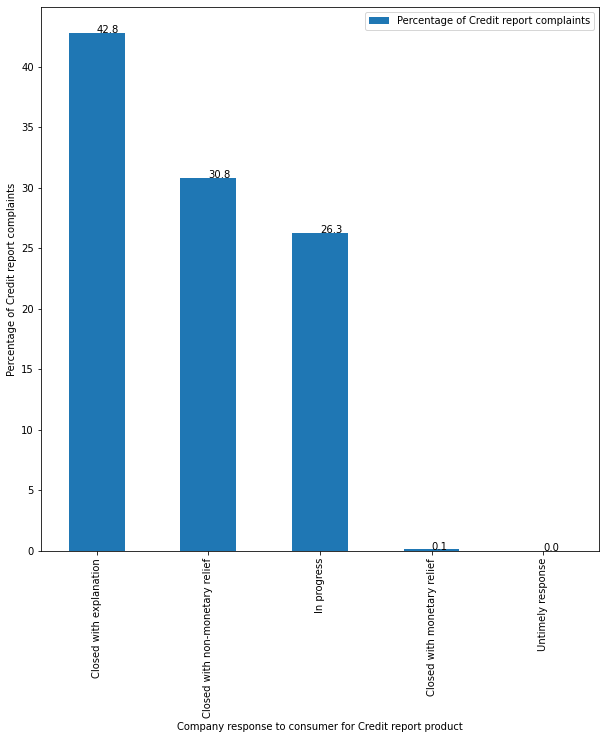

In [45]:
# Creating subset for Product-'Credit reporting, credit repair services, or other personal consumer reports'
df_creditservices = df_response[df_response['Product']== 'Credit reporting, credit repair services, or other personal consumer reports']
#Creating a subset with the percentage values
df_percent = df_creditservices['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of Credit report complaints'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response to consumer for Credit report product")
plt.ylabel("Percentage of Credit report complaints")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of Credit report complaints'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)




Credit report product has a balanced number of responses in the categories- monetary relief, explanation and non-monetary relief.

### 5. Delay Analysis

We have now two dataset- df_delay - one which contains all the complaints with delayed response , second is df_nodelay which contains cases with timley response. 
Next we shall plot bar charts to analyse the company responses in both cases.

In [70]:
df_delay=df[df['Timely response?'] == 'No']

In [71]:
df_nodelay=df[df['Timely response?'] == 'Yes']

#### Case i - Company responses to cases with delay 

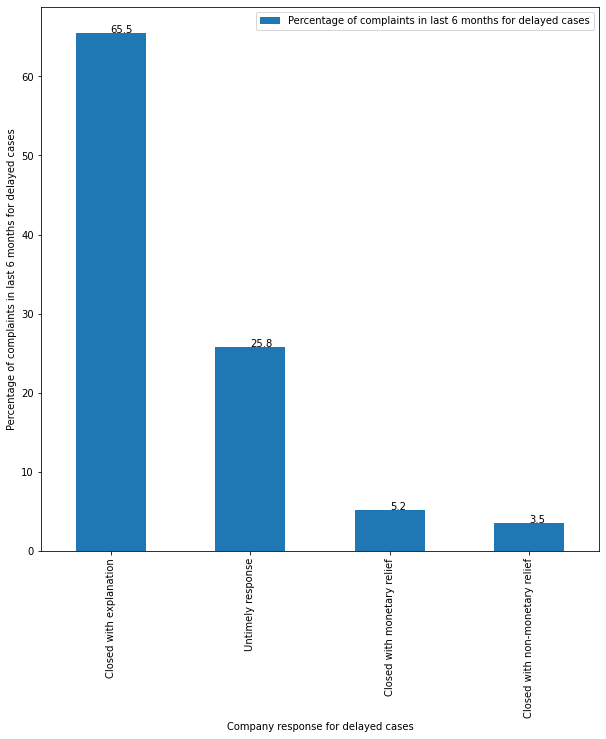

In [72]:
#Creating a subset with the percentage values
df_percent = df_delay['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of complaints in last 6 months for delayed cases'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response for delayed cases")
plt.ylabel("Percentage of complaints in last 6 months for delayed cases")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of complaints in last 6 months for delayed cases'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)

#### Case ii - Company responses for cases with timely response

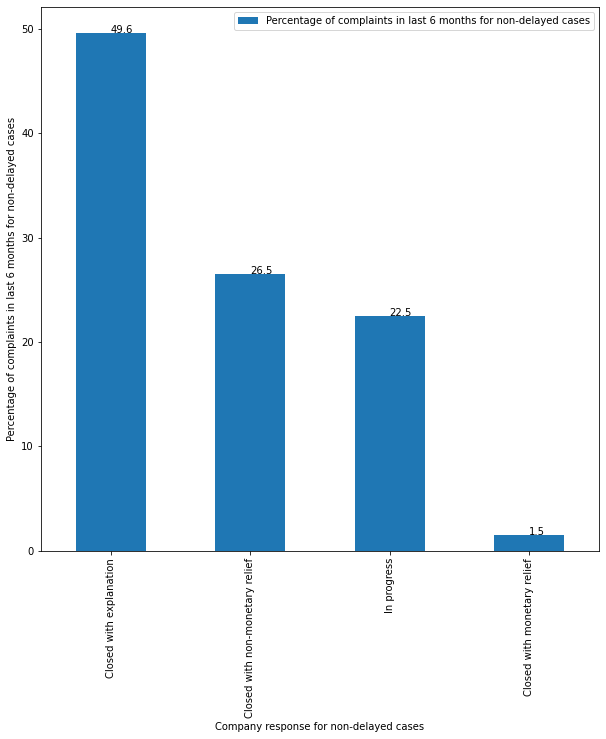

In [73]:
#Creating a subset with the percentage values
df_percent = df_nodelay['Company response to consumer'].value_counts(normalize=True).mul(100).round(1)
df_percent = df_percent.to_frame()# converting series to dataframe
df_percent = df_percent.rename(columns= {'Company response to consumer': 'Percentage of complaints in last 6 months for non-delayed cases'})# renaming columns
df_percent# new dataframe
#Plotting bar chart with percents
df_percent.plot(kind='bar', figsize=(10,10))
plt.xlabel("Company response for non-delayed cases")
plt.ylabel("Percentage of complaints in last 6 months for non-delayed cases")
# optional -to create y labels on the bar charts
x = list(df_percent.index)
y = list(df_percent['Percentage of complaints in last 6 months for non-delayed cases'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)

The two bar charts compare datasets- df_ delay and df_nodelay to check how the response pattern changed with delay and they clealy indicate that in delayed cases there were more monetary relief reponses and higher explanation responses too. This could mean that companies when delay a response may have to compensate with monetary relief or vice versa. This leads us to investigate the potential effect of sentiments in the narratives on causing a delay or seeking a monetary response relief. 